In [236]:
import numpy as np
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()
print(cwd)

/Users/fmichaud/PycharmProjects/medeas_simulations/two_population


In [237]:
simulation_subfolder = "convergence_speed"
cwd = os.getcwd()
simulation_subfolder = os.path.join(cwd,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(7,21)] #regulary space with 4 point between each order of magnitude
Ds = [0.01]
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
for L in Ls:
    for D in Ds:
        distance_summary_file = f'all_distance/L_{L}_D_{D}.dat'
        distances  = np.loadtxt(distance_summary_file)
        for distance in distances:
           all_distances1 = np.append(all_distances1,[[L,distance[0]]],axis = 0)
        sigma_within = np.std(distances[1:,0],ddof=1)
        sigma_outside = np.sqrt(np.sum((distances[1:,0]-2*D)**2)/len(distances[1:,0]))
        sigma1 = np.append(sigma1,[[L,sigma_within, sigma_outside]],axis = 0)
        
        
all_distances2= [[0,0]]
sigma2 = [[0,0,0]]
Ds = [0.1]
for L in Ls:
    for D in Ds:
        distance_summary_file = f'all_distance/L_{L}_D_{D}.dat'
        distances = np.loadtxt(distance_summary_file)
        for distance in distances:
            all_distances2 = np.append(all_distances2,[[L,distance[0]]],axis = 0)
        sigma_within = np.std(distances[1:,0],ddof=1)
        sigma_outside = np.sqrt(np.sum((distances[1:,0]-2*D)**2)/len(distances[1:,0]))
        sigma2 = np.append(sigma2,[[L,sigma_within, sigma_outside]],axis = 0)

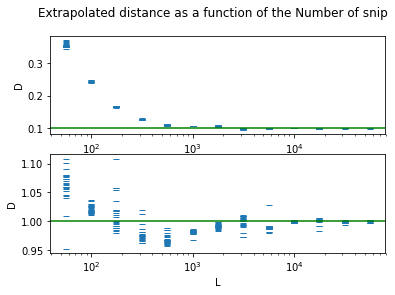

In [239]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.1,c="g")

ax = fig.add_subplot(212)
ax.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=1,c="g")
fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence.pdf")


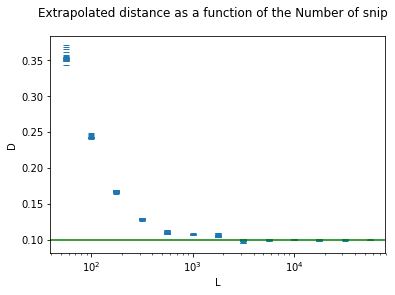

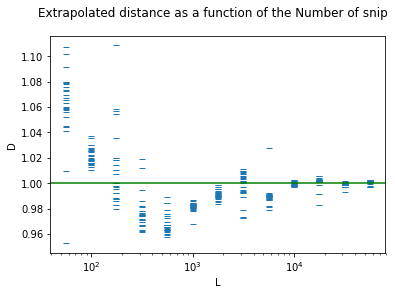

In [241]:
fig = plt.figure()

ax = fig.add_subplot(111)
#ax.set_ylim((0.08,0.2))
ax.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.1,c="g")

fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence_D=0.1.pdf")

fig = plt.figure()

ax = fig.add_subplot(111)
#ax.set_ylim((0.08,0.2))
ax.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=1,c="g")

fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence_D=1.pdf")

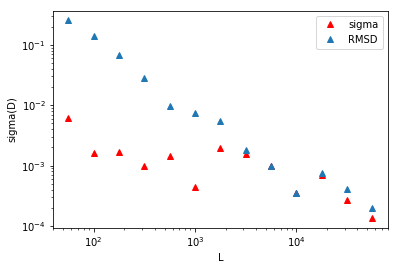

In [243]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma1[1:,0],sigma1[1:,1],"r^",label="sigma")
ax.loglog(sigma1[1:,0],sigma1[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")

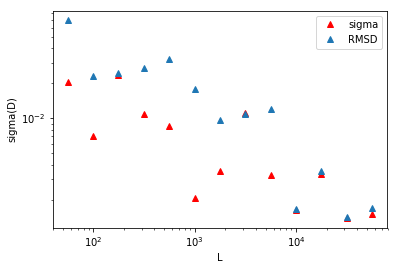

In [245]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma2[1:,0],sigma2[1:,1],"r^",label="sigma")
ax.loglog(sigma2[1:,0],sigma2[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=1.pdf")

In [246]:
sigma2

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.60000000e+01, 2.05862591e-02, 6.91306563e-02],
       [1.00000000e+02, 7.06803897e-03, 2.30108707e-02],
       [1.77000000e+02, 2.33509764e-02, 2.43630912e-02],
       [3.16000000e+02, 1.08873312e-02, 2.68822546e-02],
       [5.62000000e+02, 8.50907264e-03, 3.23964747e-02],
       [1.00000000e+03, 2.07796041e-03, 1.78563180e-02],
       [1.77800000e+03, 3.54326204e-03, 9.61328552e-03],
       [3.16200000e+03, 1.10018167e-02, 1.09163565e-02],
       [5.62300000e+03, 3.27071281e-03, 1.21268187e-02],
       [1.00000000e+04, 1.64327549e-03, 1.64809166e-03],
       [1.77820000e+04, 3.32908135e-03, 3.52504688e-03],
       [3.16220000e+04, 1.38919385e-03, 1.41362669e-03],
       [5.62340000e+04, 1.51623322e-03, 1.68994965e-03]])